<a href="https://colab.research.google.com/github/Charlie021/Optimizacion/blob/main/Seccion_Dorada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy

In [2]:
def plotPuntos(a,b):
    T = np.linspace(a, b, 100)
    U = (T*T+T)*np.cos(2*T)+T*T

    return T, U

def GraficarFuncionObjetivo():
    a,b = -5,5
    
    T = np.linspace(a, b, 100)
    U = (T*T+T)*np.cos(2*T)+T*T

    plt.figure(figsize=(6, 3))
    plt.plot(T, U, 'b')
    plt.plot(55.08, 1225.17, 'ko')
    plt.annotate(r'$55.08, 1225.17$', (55.08, 1225.17), (50, 1250))

    plt.xlabel("Temperatura")
    plt.ylabel("Costo")
    plt.grid()
    plt.show()

In [3]:
# Funcion objetivo
def U(T):
    return (T*T+T)*np.cos(2*T)+T*T

In [4]:
def GoldenSectionSearch():
    a = 5
    b = -5
    tau = 2 - 1.618033988
    epsilon = 1e-6

    cont = 0
    registro = []

    while(True):
        # Calcular alpha1 y alpha2
        alpha1 = a*(1 - tau) + b*tau
        alpha2 = a*tau + b*(1 - tau)

        # Calcular f(alpha1) y f(alpha2)
        U_alpha1 = U(alpha1)
        U_alpha2 = U(alpha2)
        
        if(U_alpha1 > U_alpha2):
            a = alpha1
        else:
            b = alpha2       

        cont = cont + 1
        registro.append([cont, alpha1, U_alpha1])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha1, U_alpha1))

        if(np.abs(U_alpha1 - U_alpha2) < epsilon):
            print("-------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha1, U_alpha1))
            break
            
    return registro

In [5]:
reg = GoldenSectionSearch()

It: 01 - Temp: 1.1803398800 - Costo: -0.4347106702
It: 02 - Temp: 2.6393202232 - Costo: 12.1190061801
It: 03 - Temp: 1.1803398864 - Costo: -0.4347106936
It: 04 - Temp: 1.7376207872 - Costo: -1.4752924904
It: 05 - Temp: 2.0820393248 - Costo: 0.9900901865
It: 06 - Temp: 1.7376207888 - Costo: -1.4752924869
It: 07 - Temp: 1.5247584274 - Costo: -1.5084513918
It: 08 - Temp: 1.6060646147 - Costo: -1.5956566246
It: 09 - Temp: 1.6563146018 - Costo: -1.5921181208
It: 10 - Temp: 1.6060646149 - Costo: -1.5956566247
It: 11 - Temp: 1.6252584020 - Costo: -1.5999722111
It: 12 - Temp: 1.6371208148 - Costo: -1.5991935381
It: 13 - Temp: 1.6252584020 - Costo: -1.5999722111
It: 14 - Temp: 1.6297894405 - Costo: -1.5999918434
It: 15 - Temp: 1.6325897763 - Costo: -1.5998087691
It: 16 - Temp: 1.6297894406 - Costo: -1.5999918434
It: 17 - Temp: 1.6280587379 - Costo: -1.6000302505
It: 18 - Temp: 1.6287198075 - Costo: -1.6000222976
It: 19 - Temp: 1.6280587379 - Costo: -1.6000302505
--------------------------------

In [6]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

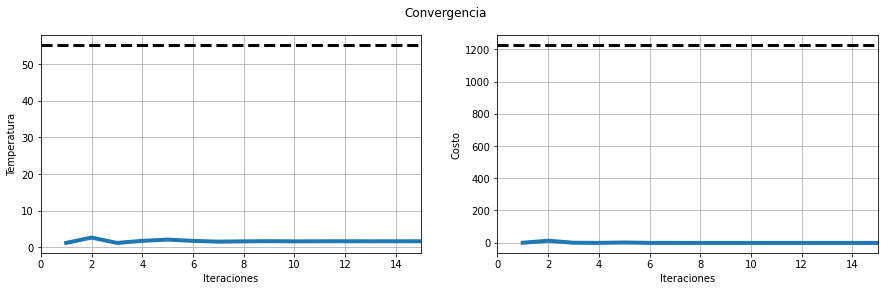

In [7]:
Evaluacion(reg)